In [2]:
# analysis.ipynb
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.sentiment import SentimentIntensityAnalyzer
import nltk

# Download VADER lexicon for sentiment analysis
nltk.download('vader_lexicon')

# Load the dataset
df = pd.read_csv('data/climate_nasa.csv')

# Display the first few rows
df.head(3)



[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\APPLE\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


,date,likesCount,profileName,commentsCount,text
0,2022-09-07T17:12:32.000Z,2,4dca617d86b3fdce80ba7e81fb16e048c9cd9798cdfd6d...,NaN,Neat comparison I have not heard it before.\n ...
1,2022-09-08T14:51:13.000Z,0,518ab97f2d115ba5b6f03b2fba2ef2b120540c9681288b...,NaN,An excellent way to visualise the invisible! T...
2,2022-09-07T17:19:41.000Z,1,d82e8e24eb633fd625b0aef9b3cb625cfb044ceb8483e1...,3.0,Does the CO2/ghg in the troposphere affect the...


In [3]:
# Descriptive statistics
print(df.describe())

       likesCount  commentsCount
count  522.000000     244.000000
mean     4.720307       8.696721
std     12.053556      12.266176
min      0.000000       1.000000
25%      0.000000       2.000000
50%      1.000000       5.000000
75%      4.000000      10.000000
max    126.000000      93.000000


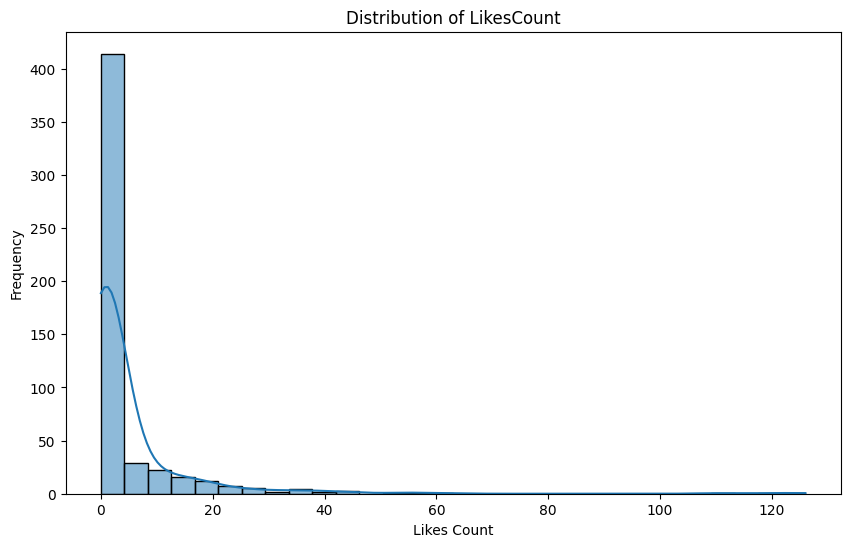

In [4]:
# Visualize LikesCount distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['likesCount'], bins=30, kde=True)
plt.title('Distribution of LikesCount')
plt.xlabel('Likes Count')
plt.ylabel('Frequency')
plt.show()

In [5]:
# Ensure all values in the 'text' column are strings by replacing NaN with an empty string
df['text'] = df['text'].fillna('')

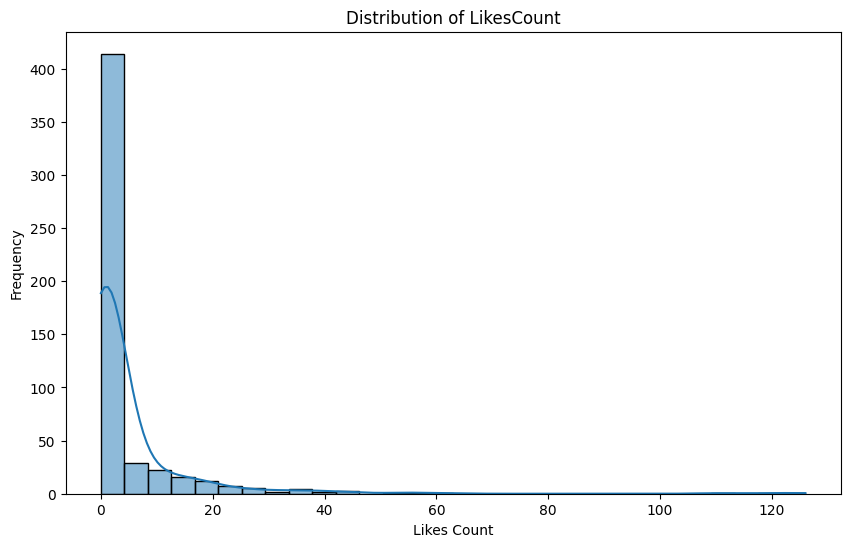

In [6]:
# Visualize LikesCount distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['likesCount'], bins=30, kde=True)
plt.title('Distribution of LikesCount')
plt.xlabel('Likes Count')
plt.ylabel('Frequency')
plt.show()

In [7]:
# Sentiment analysis
sia = SentimentIntensityAnalyzer()
df['sentiment'] = df['text'].apply(lambda x: sia.polarity_scores(x)['compound'])

In [8]:
# Categorize sentiment
df['sentiment_label'] = df['sentiment'].apply(lambda x: 'Positive' if x > 0 else ('Negative' if x < 0 else 'Neutral'))

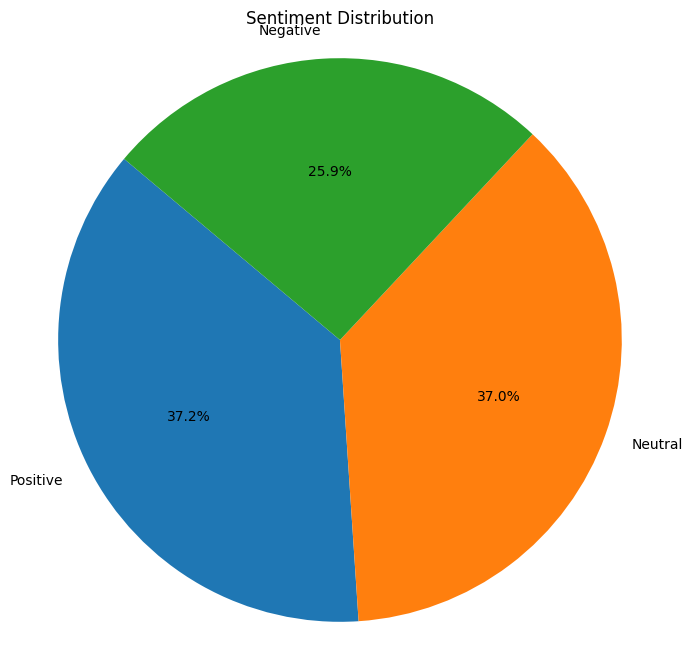

In [9]:
# Sentiment distribution
sentiment_counts = df['sentiment_label'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Sentiment Distribution')
plt.axis('equal')  # Equal aspect ratio ensures pie chart is circular.
plt.show()

In [10]:
df['date'] = pd.to_datetime(df['date'])

In [11]:
df['rolling_likes'] = df['likesCount'].rolling(window=7).mean()  # 7-day rolling average

In [12]:
# Group by date to prepare for time series forecasting
#time_series_data = df[['rolling_likes']].resample('d').mean()  # Daily mean

In [13]:
df.head(1)

,date,likesCount,profileName,commentsCount,text,sentiment,sentiment_label,rolling_likes
0,2022-09-07 17:12:32+00:00,2,4dca617d86b3fdce80ba7e81fb16e048c9cd9798cdfd6d...,NaN,Neat comparison I have not heard it before.\n ...,0.7702,Positive,NaN


In [14]:
df['likesCount'] = pd.to_numeric(df['likesCount'], errors='coerce')
df['commentsCount'] = pd.to_numeric(df['commentsCount'], errors='coerce')

In [15]:
df.head(1)

,date,likesCount,profileName,commentsCount,text,sentiment,sentiment_label,rolling_likes
0,2022-09-07 17:12:32+00:00,2,4dca617d86b3fdce80ba7e81fb16e048c9cd9798cdfd6d...,NaN,Neat comparison I have not heard it before.\n ...,0.7702,Positive,NaN


In [16]:
df.fillna({
    'likesCount': df['likesCount'].mean(),  
}, inplace=True)

In [17]:
df.head(1)

,date,likesCount,profileName,commentsCount,text,sentiment,sentiment_label,rolling_likes
0,2022-09-07 17:12:32+00:00,2,4dca617d86b3fdce80ba7e81fb16e048c9cd9798cdfd6d...,NaN,Neat comparison I have not heard it before.\n ...,0.7702,Positive,NaN


In [18]:
df.fillna({
    'commentsCount': df['commentsCount'].mean(),  
}, inplace=True)

In [19]:
df.head(1)

,date,likesCount,profileName,commentsCount,text,sentiment,sentiment_label,rolling_likes
0,2022-09-07 17:12:32+00:00,2,4dca617d86b3fdce80ba7e81fb16e048c9cd9798cdfd6d...,8.696721,Neat comparison I have not heard it before.\n ...,0.7702,Positive,NaN


In [20]:
# Convert the 'Date' column to datetime (if necessary)
df['date'] = pd.to_datetime(df['date'], errors='coerce')

In [21]:
df.head(1)

,date,likesCount,profileName,commentsCount,text,sentiment,sentiment_label,rolling_likes
0,2022-09-07 17:12:32+00:00,2,4dca617d86b3fdce80ba7e81fb16e048c9cd9798cdfd6d...,8.696721,Neat comparison I have not heard it before.\n ...,0.7702,Positive,NaN


In [22]:
# Select only numeric columns for scaling (e.g., 'likesCount', 'commentsCount')
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

In [24]:
# Convert 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'])

# Extract features from date (like year, month, etc.) if needed
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day

In [33]:
df.drop(columns=['date'])

,likesCount,profileName,commentsCount,text,sentiment,sentiment_label,rolling_likes,year,month,day
0,2,4dca617d86b3fdce80ba7e81fb16e048c9cd9798cdfd6d...,8.696721,Neat comparison I have not heard it before.\n ...,0.7702,Positive,NaN,2022,9,7
1,0,518ab97f2d115ba5b6f03b2fba2ef2b120540c9681288b...,8.696721,An excellent way to visualise the invisible! T...,0.7840,Positive,NaN,2022,9,8
2,1,d82e8e24eb633fd625b0aef9b3cb625cfb044ceb8483e1...,3.000000,Does the CO2/ghg in the troposphere affect the...,0.3736,Positive,NaN,2022,9,7
3,4,37a509fa0b5177a2233c7e2d0e2b2d6916695fa9fba3f2...,8.696721,excellent post! I defo feel the difference - o...,0.1759,Positive,NaN,2022,9,8
4,16,e54fbbd42a729af9d04d9a5cc1f9bbfe8081a31c219ecb...,26.000000,"Yes, and carbon dioxide does not harm the Eart...",0.6059,Positive,NaN,2022,9,7
...,...,...,...,...,...,...,...,...,...,...
517,0,9e17b1a6422032d47472f0216c73aafda7587e302eed5e...,8.696721,One can only hope for a peak 😞,0.4404,Positive,1.428571,2022,12,22
518,1,48e55d898603a136aefc44771f248bffd67242583a462a...,5.000000,what is the error margin for the temperature e...,-0.4019,Negative,1.142857,2022,12,22
519,3,ca5d2611814cf8c9844ed06d9916d876d2dba94dac5ff2...,8.696721,We all should volenteerly help in reducing Glo...,0.5106,Positive,1.571429,2022,12,22
520,1,a87c8aea74c9b97002b368d6143ce9c2809dcaec3103fb...,8.696721,Sergio Yepes,0.0000,Neutral,1.714286,2022,12,22


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 522 entries, 0 to 521
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype              
---  ------           --------------  -----              
 0   date             522 non-null    datetime64[ns, UTC]
 1   likesCount       522 non-null    int64              
 2   profileName      522 non-null    object             
 3   commentsCount    522 non-null    float64            
 4   text             522 non-null    object             
 5   sentiment        522 non-null    float64            
 6   sentiment_label  522 non-null    object             
 7   rolling_likes    516 non-null    float64            
 8   year             522 non-null    int32              
 9   month            522 non-null    int32              
 10  day              522 non-null    int32              
dtypes: datetime64[ns, UTC](1), float64(3), int32(3), int64(1), object(3)
memory usage: 38.9+ KB


In [40]:
# model.py
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler

# Load data
data = pd.read_csv('data/climate_nasa.csv', parse_dates=['date'], index_col='date')

# Prepare data
data['rolling_likes'] = data['likesCount'].rolling(window=7).mean().dropna()
data = data[['rolling_likes']].dropna()

# Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# Prepare sequences for LSTM
def create_dataset(data, time_step=1):
    X, Y = [], []
    for i in range(len(data)-time_step-1):
        a = data[i:(i + time_step), 0]
        X.append(a)
        Y.append(data[i + time_step, 0])
    return np.array(X), np.array(Y)

time_step = 7  # Use the past 7 days to predict the next day
X, y = create_dataset(scaled_data, time_step)
X = X.reshape(X.shape[0], X.shape[1], 1)

# Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X, y, epochs=100, batch_size=32)

# Save the model
model.save('model/lstm_model.h5')



c:\Users\APPLE\Desktop\nikhita\Machine Learning Project\ML\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - loss: 0.0275
Epoch 2/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - loss: 0.0286
Epoch 3/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.0222
Epoch 4/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - loss: 0.0219
Epoch 5/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0211
Epoch 6/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0170
Epoch 7/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0195
Epoch 8/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0175
Epoch 9/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0155
Epoch 10/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 0.0114
Epoch 11/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - loss: 0.0105
Epoch 12/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - loss: 0.0133
Epoch 13/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0126
Epoch 14/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0093
Epoch 15/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - l